<a href="https://colab.research.google.com/github/jljudge-gh/JupyterNotebooks-MathmaticalMethods-DataScience/blob/main/1_2_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python SciPy and NumPy for Linear Algebra**
To begin, NumPy, and SciPy are Python libraries used for mathematical and numerical analysis. NumPy contains array data and basic operations such as sorting, indexing, etc whereas, SciPy consists of all the numerical code. Matplotlib is a plotting library for visualization and its numerical mathematics use NumPy.


In [22]:
import numpy as np
import scipy.linalg as la
import matplotlib as mpl
import matplotlib.pyplot as plt

We will first go over the basic usage of NumPy with numpy arrays and matrices.


In [23]:
a = np.array([5,1,2,-1,0])  # 1D NumPy array
print(a)
a = np.arange(5,10) # 1D NumPy array populated with numbers 5-10
print(a)
a = np.random.rand(5) # 1D NumPy array populated with random numbers
print(a)


[ 5  1  2 -1  0]
[5 6 7 8 9]
[0.79579702 0.56681091 0.66071607 0.52465999 0.12091433]


Here, we'll show 2D array (Matrix) and some operations we can perform on arrays.

In [24]:
a = np.array([[1,2],[3,4],[5,6]])  # 2D NumPy array (matrix)
print(a)
print('Dimensions:', a.ndim)
print('Shape:', a.shape)
print('Size:', a.size)
col = a[:,1] # Selecting a column of Matrix a gives a 1D array
print(col)
print('Dimensions:', col.ndim)
print('Shape:', col.shape)
print('Size:', col.size)


[[1 2]
 [3 4]
 [5 6]]
Dimensions: 2
Shape: (3, 2)
Size: 6
[2 4 6]
Dimensions: 1
Shape: (3,)
Size: 3


We can use `reshape()` to reshape an array

In [25]:
a = np.arange(6) 
print(a)
b = a.reshape(3, 2) # Reshape this 1D array to an array with 3 rows and 2 columns
print(b)

[0 1 2 3 4 5]
[[0 1]
 [2 3]
 [4 5]]


# **1.2.1 Linear Spaces**
This section will cover linear combination, linear independence and dimension. A linear combination is an expression constructed from a subset by multiplying each term by a constant and adding the results. We will begin with the concept of a linear subspace.

####Definition 1.2.1 (Linear subspace)<br>
A linear subspace of $V$ is a subset $U\subseteq V$ that is closed under vector addition and scalar multiplication. That is, for all $\textbf{u}_1,\textbf{u}_2\in U$ and $\alpha \in \mathbb{R}$, it holds that $$\textbf{u}_1+\textbf{u}_2\in U\hspace{3mm} \text{and}\hspace{3mm} \alpha \textbf{u}_1\in U.$$<br>
In particular, $\textbf{0}$ is always in a linear subspace. We now introduce the concept of span.


####Definition 1.2.2 (Span)<br>
Let $\textbf{w}_1,\cdots,\textbf{w}_m\in V$. The span of $\{\textbf{w}_1,\cdots,\textbf{w}_m\}$, denoted $\text{span}(\textbf{w}_1,\cdots,\textbf{w}_m)$, is the set of all linear combinations of the $\textbf{w}_j$’s. That is,
$$\text{span}(\textbf{w}_1,\cdots,\textbf{w}_m)=\left\{\sum_{j=1}^m\alpha_j\textbf{w}_j:\alpha_1,\cdots,\alpha_m\in\mathbb{R}\right\}.$$

The set of linear combinations of $A$ is $span(a_1,\dots,a_m)$.

The next figure shows the span of $A=\{a_1,a_2\}$ in $\mathbb R ^3$ .

The span is a two-dimensional plane passing through these two points and the origin.

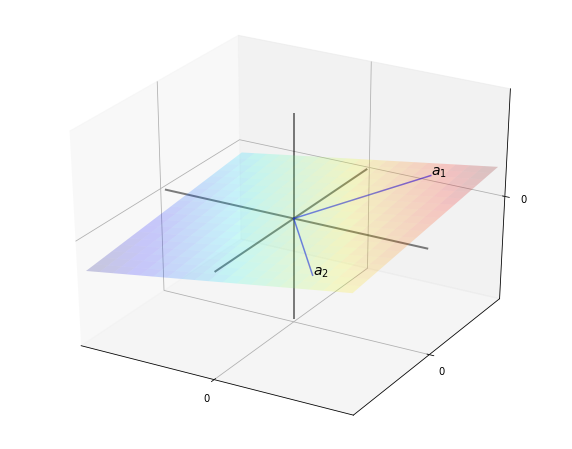

In [37]:
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')

x_min, x_max = -5, 5
y_min, y_max = -5, 5

α, β = 0.2, 0.1

ax.set(xlim=(x_min, x_max), ylim=(x_min, x_max), zlim=(x_min, x_max),
       xticks=(0,), yticks=(0,), zticks=(0,))

gs = 3
z = np.linspace(x_min, x_max, gs)
x = np.zeros(gs)
y = np.zeros(gs)
ax.plot(x, y, z, 'k-', lw=2, alpha=0.5)
ax.plot(z, x, y, 'k-', lw=2, alpha=0.5)
ax.plot(y, z, x, 'k-', lw=2, alpha=0.5)


# Fixed linear function, to generate a plane
def f(x, y):
    return α * x + β * y

# Vector locations, by coordinate
x_coords = np.array((3, 3))
y_coords = np.array((4, -4))
z = f(x_coords, y_coords)
for i in (0, 1):
    ax.text(x_coords[i], y_coords[i], z[i], f'$a_{i+1}$', fontsize=14)

# Lines to vectors
for i in (0, 1):
    x = (0, x_coords[i])
    y = (0, y_coords[i])
    z = (0, f(x_coords[i], y_coords[i]))
    ax.plot(x, y, z, 'b-', lw=1.5, alpha=0.6)


# Draw the plane
grid_size = 20
xr2 = np.linspace(x_min, x_max, grid_size)
yr2 = np.linspace(y_min, y_max, grid_size)
x2, y2 = np.meshgrid(xr2, yr2)
z2 = f(x2, y2)
ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=True, alpha=0.2)
plt.show()

QuantEcon$^1$

####Lemma 1.2.3 (Every Span is a Linear Subspace)<br>
Let $W=\text{span}(\textbf{w}_1,\cdots,\textbf{w}_m)$. Then $W$ is a linear subspace.

 Proof:<br>
To show that $W$ is a linear subspace, we need to show that $\alpha \textbf{u}_1+\textbf{u}_2\in W$ for $\textbf{u}_1,\textbf{u}_2\in W$ and $\alpha\in\mathbb{R}$. Then
$$\textbf{u}_1=\sum_{j=1}^m\beta_{1,j}\textbf{w}_j\hspace{3mm}\text{and}\hspace{3mm}\textbf{u}_2=\sum_{j=1}^m\beta_{2,j}\textbf{w}_j$$ 
and
$$\alpha \textbf{u}_1+\textbf{u}_2=\alpha\sum_{j=1}^m\beta_{1,j}\textbf{w}_j+\sum_{j=1}^m\beta_{2,j}\textbf{w}_j=\sum_{j=1}^m(\alpha\beta_{1,j}+\beta_{2,j})\textbf{w}_j.$$
Since $\alpha\beta_{1,j}+\beta_{2,j}\in\mathbb{R}$, $\sum_{j=1}^m(\alpha\beta_{1,j}+\beta_{2,j})\textbf{w}_j \in W$.<br>
Therefore, we conclude that $\alpha \textbf{u}_1+\textbf{u}_2\in W$. $\square$





####Definition 1.2.5 (Linear Independence)<br>
A list of vectors $\textbf{u}_1,\cdots,\textbf{u}_m$ is linearly independent if none of them can be written as a linear combination of the others, that is,
$$\forall i,\textbf{u}_i\notin \text{span}(\{\textbf{u}_j:j\neq i\}).$$
A list of vectors is called linearly dependent if it is not linearly independent.

####Lemma 1.2.6<br>
The vectors $\textbf{u}_1,\cdots,\textbf{u}_m$ are linearly independent if and only if $$\sum_{j=1}^m\alpha_j\textbf{u}_j=0 \Rightarrow \alpha_j=0, \forall j.$$
Equivalently, $\textbf{u}_1,\cdots,\textbf{u}_m$ are linearly dependent if and only if there exist $\alpha_j$’s, not all zero, such that $\sum_{j=1}^m\alpha_j\textbf{u}_j=\textbf{0}$.

In [43]:
import sympy
# Transformation to row echelon form
A = np.array([[3,2,1],[9,6,4]])
print("Matrix A :")
print("{}".format(A))

# Use sympy.rref() method 
M_rref=sympy.Matrix(A).rref()
print("Row echelon form of matrix M and the pivot columns : ")
print("{}".format(M_rref))  
print('Since the only solution is the trivial solution, the vectors are independent.')

Matrix A :
[[3 2 1]
 [9 6 4]]
Row echelon form of matrix M and the pivot columns : 
(Matrix([
[1, 2/3, 0],
[0,   0, 1]]), (0, 2))
Since the only solution is the trivial solution, the vectors are independent.


####Definition 1.2.7<br>
Let $U$ be a linear subspace of $V$. A basis of $U$ is a list of vectors $\textbf{u}_1,\cdots, \textbf{u}_m$ in $U$ that: (1) span $U$, that is, $U=\text{span}(\textbf{u}_1,\cdots,\textbf{u}_m)$; and (2) are linearly independent.

####Theorem 1.2.8 (Dimension Theorem)<br>
Let $U$ be a linear subspace of $V$. Any basis of $U$ always has the same number of elements. All bases of $U$ have the same length, that is, the same number of elements. We call this number the dimension of $U$ and denote it $\text{dim}(U)$.

####Lemma 1.2.9 (Characterization of Linearly Dependent Sets)<br>
Let $\textbf{u}_1,\cdots,\textbf{u}_m$ be a linearly dependent list of vectors with linearly independent subset, $\textbf{u}_i,i\in\{1,\cdots,k\},k<m$. Then there is an $i>k$ such that:

1.  $\textbf{u}_i\in \text{span}(\textbf{u}_1,\cdots,\textbf{u}_{i−1})$
2.  $\text{span}(\{\textbf{u}_j:j\in \{1,\cdots,m\})=span(\{\textbf{u}_j:j\in\{1,\cdots,m\},j\neq i\})$



# **1.2.2 Orthogonality**
Sets of vectors ${v_1,v_2, v_3...v_n}$ are mutually orthogonal when each vector is orthogonal to every other vector in the set. That is, sets are mutually orthogonal when each combination/pair of vectors within the set are orthogonal to each other. i.e., $v_i \perp v_j$.

Another characteristic of orthogonal vectors it that their dot product $u \cdot v$ equals zero. 


**Example:** Consider these following three vectors in 3D space: 
$v_1 = \begin{bmatrix} 2 \\ 0 \\ 2 \end{bmatrix}, \space v_2 = \begin{bmatrix} -3 \\ 0 \\ 3 \end{bmatrix}, \space v_3 = \begin{bmatrix} 0 \\ 5 \\ 0 \end{bmatrix} \space$

The dot product of these vectors is: 
\begin{align*} 
v_1 \cdot v_2 = v_1^T v_2 = (2\times -3) + (0 \times 0) + (2 \times 3) = 0 \\
v_1 \cdot v_3 = v_1^T v_3 = (2\times 0) + (0 \times 5) + (2 \times 0) = 0 \\
v_2 \cdot v_3 = v_2^T v_3 = (-3\times 0) + (0 \times 5) + (3 \times 0) = 0
\end{align*}


We can verify this with NumPy:

In [73]:
v1 = np.array([ 2, 0, 2])
v2 = np.array([ -3, 0, 3])
v3 = np.array([0, 5, 0])
dot_product = np.dot(v1,v2)
dot_product = np.dot(v1,v3)
dot_product = np.dot(v2,v3)
print("The dot product of v1 and v2 is", dot_product )
print("The dot product of v1 and v3 is", dot_product )
print("The dot product of v2 and v3 is", dot_product )

The dot product of v1 and v2 is 0
The dot product of v1 and v3 is 0
The dot product of v2 and v3 is 0


Because the dot products are all zero, these three vectors are mutually orthogonal.
This is illustrated in the below figure. 

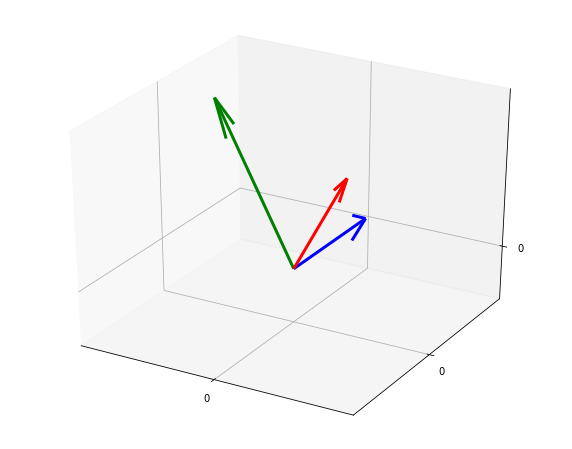

In [84]:
from mpl_toolkits.mplot3d import Axes3D
# 3D representation of the orthogonal vectors

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.set(xlim=(-5, 5), ylim=(-5, 5), zlim=(-1, 3),
       xticks=(0,), yticks=(0,), zticks=(0,))

# Define the orthogonal vectors
v1 = np.array([ 2, 0, 2])
v2 = np.array([ -3, 0, 3])
v3 = np.array([0, 5, 0])
 
# Plot the orthogonal vectors
ax.quiver( 0, 0, 0, v1[0], v1[1], v1[2], color = 'r', lw=3, arrow_length_ratio=0.2)
ax.quiver( 0, 0, 0, v2[0], v2[1], v2[2], color = 'g', lw=3, arrow_length_ratio=0.2)
ax.quiver( 0, 0, 0, v3[0], v3[1], v3[2], color = 'b', lw=3, arrow_length_ratio=0.2)
plt.show()


###1.2.2.1 Orthonormal Bases
####Definition 1.2.10 (Norm and Inner Product) $\langle\textbf{u},\textbf{v}\rangle=\textbf{u}\cdot \textbf{v} =\sum_{1}^n \textbf{u}_i \textbf{v}_i$ and $||\textbf{u}||=\sqrt{\sum_{1}^n \textbf{u}_i^2}$

####Definition 1.2.11 <br>
A list of vectors $\{\textbf{u}_1,\dots,\textbf{u}_m\}$ is orthonormal if the $\textbf{u}_i$’s are pairwise orthogonal and each has norm 1, that is for all $i$ and all $j\neq i, \langle\textbf{u}_i,\textbf{u}_j\rangle=0$ and $||\textbf{u}_i||=1$. 

**Example:** Orthogonalizing three vectors

In [102]:
np.random.seed(13)
xorig = np.random.randn(200)
yorig = np.random.randn(200)
zorig = np.random.randn(200)

1.0
1.0
-1.778790904544315e-17
1.0
-7.862429487401852e-18
-8.789942184211279e-18


In [103]:
# Orthonormalize  x  and  y 
x = xorig/la.norm(xorig)
y = yorig
y = y - x.dot(y)*x
y = y / la.norm(y)
print(la.norm(x))
print(la.norm(y))
print(x.dot(y))

1.0
1.0
-1.778790904544315e-17


In [104]:
# Orthonormalize z
z = zorig
z = z - np.dot(z, x)*x - np.dot(z,y)*y
z = z / la.norm(z)
print(la.norm(z))
print(x.dot(z))
print(y.dot(z))

1.0
-7.862429487401852e-18
-8.789942184211279e-18


####Lemma 1.2.12<br>
Let $\{\textbf{u}_1,\cdots,\textbf{u}_m\}$ be an orthonormal list of vectors.
1.   $||\sum_{j=1}^m \alpha_j\textbf{u}_j||^2=\sum_{j=1}^m \alpha_j^2$ for any $\alpha_j\in\mathbb{R},j\in\{1,\cdots,m\}$
2.  $\{\textbf{u}_1,\dots,\textbf{u}_m\}$ are linearly independent.

####Theorem 1.2.13 (Orthonormal Basis Expansion)<br>
Let $\textbf{q}_1,\dots,\textbf{q}_m$ be an orthonormal basis of $\mathscr{U}$ and let $\textbf{u}\in \mathscr{U}$. Then $$\textbf{u}=\sum_{j=1}^m\langle\textbf{u},\textbf{q}_j\rangle\textbf{q}_j.$$

###1.2.2.2 Best Approximation Theorem
The following optimization problem occurs frequently in applications. We
have a linear subspace $\mathscr{U} \subseteq V$ and a vector $\textbf{v} \notin \mathscr{U}$. We want to find the vector $\textbf{v}∗$ in $\mathscr{U}$ that is closest to $\textbf{v}$ in 2-norm as in Figure 1.1, that is, we
want to solve
\begin{align*} 
\min _{\mathbf{v}^{*} \in \mathscr{U}}\left\|\mathbf{v}^{*}-\mathbf{v}\right\| .
\end{align*} 


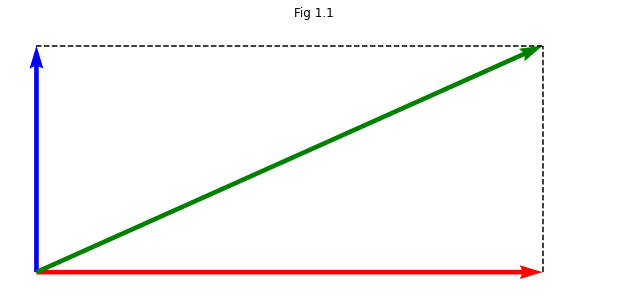

In [83]:
# Figure 1.1
import matplotlib.pyplot as plt
v = np.array([math.sqrt(3),1])
v1 = np.array([math.sqrt(3),0]) # v*
v2 = np.array([0,1])            # v-v*
M = np.array([v1,v2,v])

origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point

plt.quiver(*origin, M[:,0], M[:,1], color=['r','b','g'], angles='xy', scale_units='xy', scale=1)
plt.vlines(math.sqrt(3) ,0 ,1, linestyle="dashed")
plt.hlines(1, 0, math.sqrt(3), linestyle="dashed")
plt.xlim(-0.1, 2)
plt.ylim(-0.1, 1.1)
plt.title("Fig 1.1")
plt.axis('off')
plt.show()


####Definition 1.2.15 (Orthogonal Projection)<br>
Let $U\subset V$ be a linear subspace with orthonormal basis $\textbf{q}_1,\cdots,\textbf{q}_m$. The orthogonal projection of $\textbf{v}\in V$ on $U$ is defined as $$\mathscr{P}_{\mathscr{U}}\textbf{v}=\sum_{j=1}^m\langle\textbf{v},\textbf{q}_j\rangle\textbf{q}_j$$

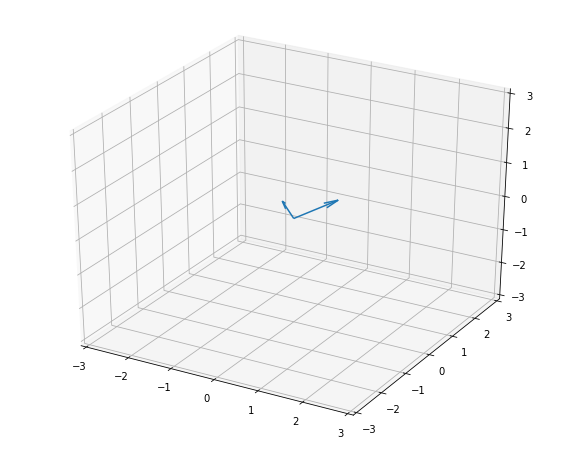

In [94]:
import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create two random 3D vectors
np.random.seed(13)
x = np.random.randn(3)
y = np.random.randn(3)
                    
# Make them orthonormal
y = y - y.dot(x)/x.dot(x)*x
x = x/la.norm(x)
y = y/la.norm(y)

ax.set(xlim=(-3, 3), ylim=(-3, 3), zlim=(-3, 3))#, xticks=(0,), yticks=(0,), zticks=(0,))
xy = np.array([x, y]).T
ax.quiver(0, 0, 0, xy[0], xy[1], xy[2],)

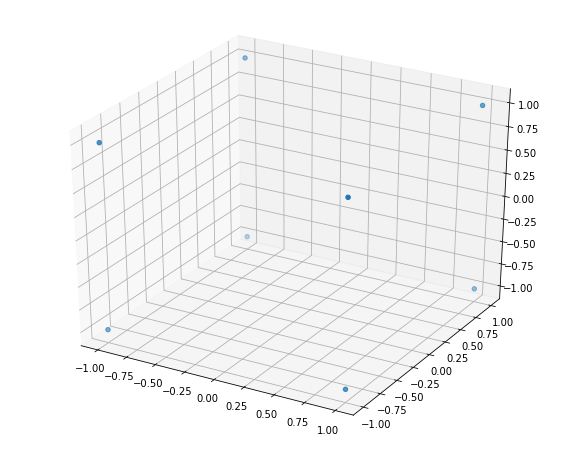

In [97]:
# Create an array with the cornerpoints of a cube
points = np.array([ [-1,-1,-1],   [-1,-1,1],  [-1,1,-1],  [-1,1,1],
                    [1,-1,-1],    [1,-1,1],   [1,1,-1],   [1,1,1],
                  ])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:, 1], points[:, 2])

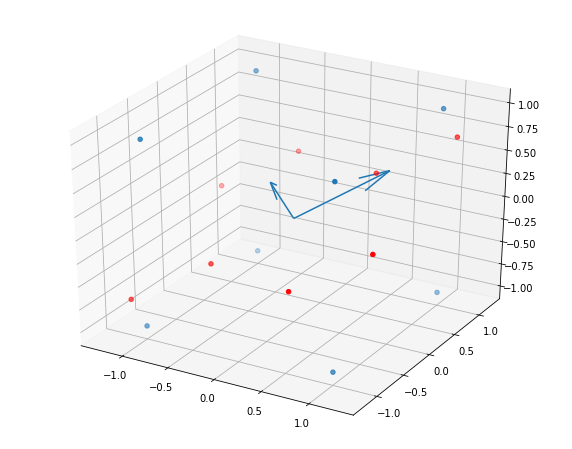

In [99]:
# Construct the projection matrix
Q = np.array([ x,y,np.zeros(3) ]).T
P = Q.dot(Q.T)

# Project the points, assign to proj_points
proj_points = np.einsum("ij,nj->ni", P, points)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:, 1], points[:, 2])
ax.scatter(proj_points[:,0], proj_points[:, 1], proj_points[:, 2], color="red")

xy = np.array([x, y]).T
ax.quiver(0, 0, 0, xy[0], xy[1], xy[2],)

Orthogonal Projection$^2$

####Theorem 1.2.16 (Best Approximation Theorem)<br>
Let $\mathscr{U}\subseteq V$ be a linear subspace with orthonormal basis $\textbf{q}_1,\cdots,\textbf{q}_m$ and let $\textbf{v}\in V$. For any $\textbf{u}\in \mathscr{U}$ $$||\textbf{v}-\mathscr{P}_{\mathscr{U}}\textbf{v}||\leq||\textbf{v}-\textbf{u}||.$$
Furthermore, if $\textbf{u}\in \mathscr{U}$ and the inequality above is an equality, then $\mathscr{U}=\mathscr{P}_{\mathscr{U}}\textbf{v}$.

####Lemma 1.2.17 (Pythagorean theorem)<br>
Letu, $\textbf{u},\textbf{v}\in V$ be orthogonal. Then $||\textbf{u}+\textbf{v}||^2=||\textbf{u}||^2+||\textbf{v}||^2$.

####Lemma 1.2.18 (Cauchy-Schwarz)<br>
For any $\textbf{u},\textbf{v}\in V,|\langle\textbf{u},\textbf{v}\rangle|\leq||\textbf{u}||||\textbf{v}||$.


**Cauchy-Schwartz Inequality**: This states that for any two vectors x and y, the inner product of x and y will always be less than or equal to the product of the 2-norms of the vectors.
 The following is a simple function that demonstrates this inequality. It will create two vectors of length 5 with elements between 1 and 50 using numpy's randint function. The inner product is computed with numpy's inner function and is then compared with the right side of the inequality. The function will return True if the inequality holds and False otherwise and, therefore, the function should always return True.

In [106]:
def cauchy_schwartz_inequality():
    x = np.random.randint(1, 50, 5)
    y = np.random.randint(1, 50, 5)
    
    inner_prod = np.inner(x, y)
    right = np.sqrt(np.sum(np.power(x, 2))) * np.sqrt(np.sum(np.power(y, 2)))
    
    return inner_prod <= right

The following will test the inequality by running the `cauchy_schwartz_inequality()` function created above 100,000 times and appends the results to a list. Using Python's any method, we can then see if any of the appended results in the list is False.

In [108]:
res = []
for i in range(0, 50000):
    res.append(cauchy_schwartz_inequality())
    
any(x == False for x in res)

False

Vector Norms Inequalities$^3$

####Lemma 1.2.19 (Orthogonal Decomposition)<br>
Let $\mathscr{U}\subseteq \textbf{V}$ be a linear subspace with orthonormal basis $\textbf{q}_1,\cdots,\textbf{q}_m$ and let $\textbf{v}\in V$. For any $\textbf{u}\in \mathscr{U}, \langle\textbf{v}-\mathscr{P}_{\mathscr{U}}\textbf{v},\textbf{u}\rangle=0$. In particular, $\textbf{v}$ can be decomposed as $(\textbf{v}-\mathscr{P}_{\mathscr{U}}\textbf{v})+\mathscr{P}_{\mathscr{U}}\textbf{v}$ where the two terms are orthogonal.

# **1.2.3 Eigenvalues and Eigenvectors**

####Definition 1.2.20 (Eigenvalues and eigenvectors)<br>
Let $A\in \mathbb{R} ^{d×d}$ be a square matrix. Then $\lambda\in \mathbb{R}$ is an eigenvalue of $\textbf{A}$ if there exists a non-zero vector $\textbf{x}\neq \textbf{0}$ such that $$\textbf{Ax=λx}.$$<br>
The vector $\textbf{x}$ is referred to as an eigenvector.

Let $\textbf{A}$ be a square matrix. A non-zero vector $\textbf{v}$ is an eigenvector for $\textbf{A}$ with eigenvalue $\lambda$ if $$A\mathbf{v} = \lambda \mathbf{v}$$  <br>
Rearranging the equation, we see that $\textbf{v}$ is a solution of the homogeneous system of equations
$$\left( A - \lambda I \right) \mathbf{v} = \mathbf{0} $$ <br>
where $I$ is the identity matrix of size $n$ . Non-trivial solutions exist only if the matrix $A - \lambda I$ is singular which means $\mathrm{det}(A - \lambda I) = 0$. Therefore eigenvalues of  are roots of the characteristic polynomial <br> $$p(\lambda) = \mathrm{det}(A - \lambda I)$$

In [113]:
#  Calculating the eigenvalues and eigenvectors for a square array with the eig function in numpy.linalg
from numpy.linalg import eig

a = np.array([[0, 2], 
              [2, 3]])
w,v=eig(a)
print('The eigenvalues of A are:\n', w)
print('The corresponding eigenvectors are:\n', v)

The eigenvalues of A are:
 [-1.+0.j  4.+0.j]
The corresponding eigenvectors are:
 [[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


####Example 1.2.21 (No Real Eigenvalues): <br>
Set $d=2$ and let 
$$\textbf{A}=\begin{pmatrix}
0 & -1\\
1&0
\end{pmatrix}$$

For $\lambda$ to be an eigenvalue, there must be an non-zero eigenvector $\textbf{x}=(x_1,x_2)^T$ such that $$A\textbf{x}=\lambda \textbf{x}$$ or put differently \begin{align} −x_2=\lambda x_1 \ \text{and} \  x_1=\lambda x_2.\end{align} <br>
Replacing these equations into each other, it must be that  \begin{align} −x_2=\lambda^2x_2\ \text{and} \ x_1=−\lambda^2x_1 \end{align}. 

Because $x_1,x_2$ cannot both be 0, $\lambda$ must satisfy the equation $$\lambda^2=-1$$ for which there is no real solution.<br>
  
  In general, $A\in\mathbb{R}^{d×d}$ has at most $d$ distinct eigenvalues.

####Lemma 1.2.22 (Number of Eigenvalues):<br>
Let $\textbf{A}\in \mathbb{R}^{d\times d}$ and let $\lambda_1,\dots,\lambda_m$ be distinct eigenvalues of $\textbf{A}$ with corresponding non-zero eigenvectors $\textbf{x}_1,\dots,\textbf{x}_m$. Then $\textbf{x}_1,\dots ,\textbf{x}_m$ are linearly independent. As a result, $m\leq d$. \\

###1.2.3.1 Diagonalization of Symmetric Matrices


####Example 1.2.23 (Diagonal (and Similar) Matrices) <br>
Let $A$ be similar to a matrix $D=\text{diag}(\lambda_1,\cdots,\lambda_d)$ with distinct diagonal entries, that is, there exists an on singular matrix $P$ such that $$A=PDP^{−1}$$. Let ${\textbf{p}}_1,\dots,{\textbf{p}}_d$ be the columns of ${P}$.Then $${AP}={PD}$$ which implies that $${A\textbf{p}}_i=\lambda_i{\textbf{p}}_i.$$

####Theorem 1.2.24<br>
If $\textbf{A}$ is symmetric, then any two eigenvectors from different eigenspaces are orthogonal.

####Theorem 1.2.25 (The Spectral Theorem for Symmetric Matrices) <br>
An $n\times n$ symmetric matrix $A$ has the following properties:
* $A$ has $n$ real eigenvalues, counting multiplicities.
* If $\lambda$ is an eigenvalues of $A$ with multiplicity $k$, then the eigenspace for $\lambda$ is k-dimensional.
* The eigenspaces are mutually orthogonal, in the sense that eigenvectors corresponding to different eigenvalues are orthogonal.
* $A$ is orthogonally diagonalizable.

###1.2.3.2 Constrained Optimization

####Theorem 1.2.26<br>
Let $A$ be $n\times n$ symmetric matrix $A$ with the an orthogonal diagonalization $tA=PDP^{−1}$. The columns of $P$ are orthonormal eigenvectors ${v}_1,\dots,{v}_n$ of $A$. Assume that the diagonal of $D$ are arranged so that $\lambda_1\leq\lambda_2,\dots\leq\lambda_n$. Then 
$$\min_{x\neq 0}\frac{{x}^TA{x}}{{x}^T{x}}=\lambda_1$$ 
is achieved when ${x}={v}_1$ and  
$$\min_{x\neq 0}\frac{{x}^TA{x}}{{x}^T{x}}=\lambda_n$$ 
is achieved when ${x}={v}_n$.

# References

[QuantEcon$^1$](https://python.quantecon.org/linear_algebra.html)
[Orthogonal Projection$^2$](https://andreask.cs.illinois.edu/cs357-s15/public/demos/05-orthgonality/Orthogonal%20projection.html) [Vector Norms Inequalities$^3$](https://aaronschlegel.me/vector-norms-inequalities-python.html)